In [7]:
import numpy as np
import netCDF4
data_path = "../scripts/data/"

In [8]:
example_input = data_path+"data_sub/data-2110-07-30-00-1-mesh.npz"
our_input = data_path+"ours/rsut_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc"
example = np.load(example_input)
our = netCDF4.Dataset(our_input)

In [24]:
#processing example data
#1. raw input is 1D
lst = example.files
for item in lst:
    print(item, np.shape(example[item]))
    print(example[item], np.shape(example[item]))


data (16, 10242)
[[ 5.52630730e+01  1.58050890e+01  2.92593517e+01 ...  6.67976856e+00
   4.62865753e+01  3.74460335e+01]
 [ 5.56564927e-01 -4.84110022e+00 -2.83480859e+00 ...  5.92141151e+00
   6.51298141e+00  5.06124973e-01]
 [ 2.17996335e+00  1.93457568e+00 -2.74993396e+00 ... -2.84790945e+00
  -1.79587483e+00  7.04091787e+00]
 ...
 [ 1.15469017e+02  2.12602707e+02  1.04669716e+02 ...  1.04883011e+02
   1.40925781e+02  1.71050369e+02]
 [ 1.24947725e+04  1.23663057e+04  1.24793145e+04 ...  1.16501172e+04
   1.24929785e+04  1.24075283e+04]
 [ 6.67911911e+01  6.41005859e+01  6.66440659e+01 ...  6.09053802e+01
   6.51907959e+01  6.39139404e+01]] (16, 10242)
labels (3, 10242)
[[ True  True  True ...  True  True  True]
 [False False False ... False False False]
 [False False False ... False False False]] (3, 10242)


In [26]:
from deepsphere.data.datasets.dataset import ARTCDataset
data = ARTCDataset(path=data_path+"data_sub/", download=False) # loop around files in directory located at path 

In [27]:
len(data)

32

In [32]:
np.shape(data[0][0])

(16, 10242)

0.5.1


/Users/sookim/miniconda3/envs/deepsphere/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

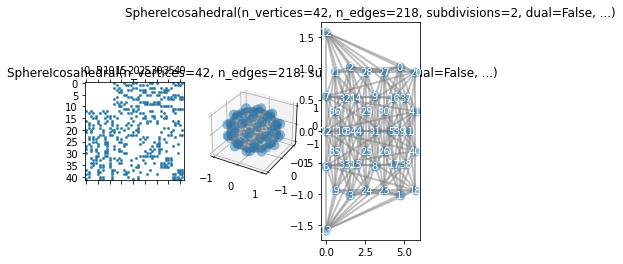

In [62]:
from pygsp.graphs.nngraphs.sphereicosahedral import SphereIcosahedral
import matplotlib.pyplot as plt
import imageio
import pygsp
print(pygsp.__version__)
G = SphereIcosahedral()
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133)
_ = ax1.spy(G.W, markersize=1.5)
_ = G.plot(ax=ax2)
G.set_coordinates('sphere', dim=2)
_ = G.plot(ax=ax3, indices=True)
fig.show()
print(len(G.W))

In [59]:
#Our data
our 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7 CMIP-6.2
    activity_id: CMIP
    case_id: 15
    cesm_casename: b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact: cesm_cmip6@ucar.edu
    creation_date: 2019-01-16T22:07:50Z
    data_specs_version: 01.00.29
    experiment: all-forcing simulation of the recent past
    experiment_id: historical
    external_variables: areacella
    forcing_index: 1
    frequency: mon
    grid: native 0.9x1.25 finite volume grid (192x288 latxlon)
    grid_label: gn
    initialization_index: 1
    institution: National Center for Atmospheric Research, Climate and Global Dynamics Laboratory, 1850 Table Mesa Drive, Boulder, CO 80305, USA
    institution_id: NCAR
    license: CMIP6 model data produced by <The National Center for Atmospheric Research> is licensed under a Creative Commons Attribution-[]ShareAlike 4.0 International License (https://creativecommons.org/licenses/). Consult https://p